# 🧪 Lab 6: Dimensionality Reduction with PCA and t-SNE

**Course**: Introduction to Machine Learning  
**Instructor**: Ross  
**Objective**: Learn how to reduce high-dimensional data to lower dimensions for visualization and analysis using PCA and t-SNE.

In this lab, you'll explore how dimensionality reduction helps simplify complex datasets while preserving structure. We'll use PCA for linear reduction and t-SNE for nonlinear embedding.

You'll learn to:
- Apply PCA to reduce dimensions and interpret variance
- Use t-SNE to visualize clusters in high-dimensional data
- Compare linear vs. nonlinear reduction techniques
- Understand when and why to use dimensionality reduction

In [1]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 📥 Step 2: Simulate Canadian census-style data
We'll generate synthetic data for 500 individuals, including income, education, employment, housing cost, age, household size, and province.

In [2]:
# Simulate dataset
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'Income': np.random.normal(60000, 15000, size=n),
    'Education_Level': np.random.randint(1, 6, size=n),
    'Employment_Status': np.random.choice([0, 1], size=n),
    'Housing_Cost': np.random.normal(1200, 400, size=n),
    'Age': np.random.randint(20, 70, size=n),
    'Household_Size': np.random.randint(1, 6, size=n),
    'Province': np.random.choice(['ON', 'QC', 'BC', 'AB', 'MB'], size=n)
})

# One-hot encode province
df = pd.get_dummies(df, columns=['Province'], drop_first=True)
df.head()

,Income,Education_Level,Employment_Status,Housing_Cost,Age,Household_Size,Province_BC,Province_MB,Province_ON,Province_QC
0,67450.712295,2,1,1726.957626,67,2,False,True,False,False
1,57926.035482,2,1,1279.039842,64,3,False,True,False,False
2,69715.328072,3,0,2030.104349,55,1,False,False,False,True
3,82845.447846,3,0,924.324873,49,1,False,False,True,False
4,56487.699379,5,0,1894.385521,68,1,False,False,False,False


## 🧹 Step 3: Scale the features
Dimensionality reduction techniques are sensitive to feature scales, so we'll standardize the data.

In [3]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled[:5]

array([[ 0.49973518, -0.67953328,  0.99203175,  1.20408639,  1.56224408,
        -0.70345394, -0.49687301,  2.        , -0.52489066, -0.46852129],
       [-0.14802256, -0.67953328,  0.99203175,  0.09403612,  1.35361106,
        -0.00971238, -0.49687301,  2.        , -0.52489066, -0.46852129],
       [ 0.65374801,  0.02391732, -1.00803226,  1.95535842,  0.72771199,
        -1.3971955 , -0.49687301, -0.5       , -0.52489066,  2.13437475],
       [ 1.54670605,  0.02391732, -1.00803226, -0.78503469,  0.31044594,
        -1.3971955 , -0.49687301, -0.5       ,  1.90515869, -0.46852129],
       [-0.24584145,  1.43081852, -1.00803226,  1.61901384,  1.63178842,
        -1.3971955 , -0.49687301, -0.5       , -0.52489066, -0.46852129]])

## 📉 Step 4: Apply PCA
PCA reduces dimensions by finding directions (principal components) that capture the most variance in the data.

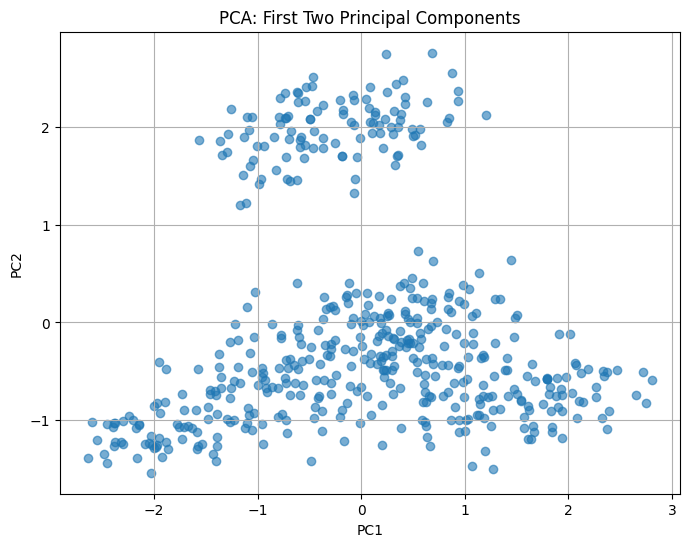

Explained variance ratio: [0.13541863 0.1292193 ]


In [5]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

## 🔍 Step 5: Apply t-SNE
t-SNE is a nonlinear technique that preserves local structure and is great for visualizing clusters.

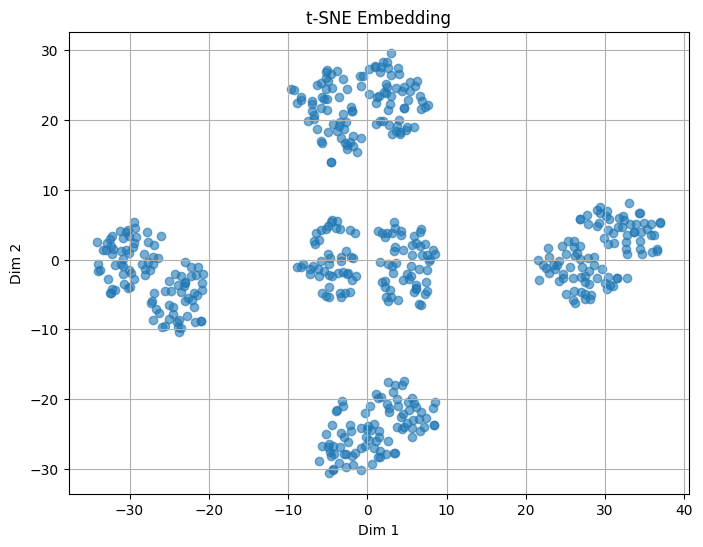

In [6]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title("t-SNE Embedding")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

## 🧪 Step 6: Compare PCA and t-SNE
Try changing the number of components, perplexity, or scaling method. Observe how PCA captures global variance while t-SNE reveals local clusters.

## 📝 Reflection Questions

1. What does PCA tell us about the structure of the data?
2. How does t-SNE differ from PCA in terms of what it reveals?
3. When would you use dimensionality reduction in a real-world project?
4. How does scaling affect the outcome of PCA and t-SNE?